# <span id="toc">  Esercitazione 1 - Generature di Numeri pseudo Casuali (GNC) </span>

[  1.1 - Test per il GNC ](#ex-1.1)

[  1.2 - Estensione del GNC ](#ex-1.2)

[  1.3 - Simulazione dell'esperimento di Buffon’s](#ex-1.3)



## <span id="ex-1.1">  Esercizio 1.1 </span>[^](#toc)

In questo esercizio vogliamo verificare il corretto funzionamento del generatore di numeri casuali (GNC) che useremo per tutto il laboratorio. Iniziamo inoltre a prendere dimestichezza col metodo del data blocking, del quale pure faremo abbondante utilizzo nel corso del laboratorio.

#### Data blocking

Il metodo del data blocking consiste nel raggruppare le singole misure $x_i$ (sia che esse siano dirette, che indirette) in $N$ blocchi, in ciascuno dei quali si calcolano media $\langle x \rangle = \frac{1}{N}\sum_1^N x_i $ e deviazione standard $\sigma^2 = \langle x^2 \rangle - \langle x \rangle ^2$, dove $\langle \cdot \rangle$ indica sempre l'operazione di media.

Il data blocking è fondamentale per **abbattere la correlazione** tra blocchi adiacenti, quindi può essere utilizzato per **simulare esperimenti successivi tra loro scorrelati**. Come vedremo meglio nell'[esercitazione 7](../07-ok/my-07.ipynb), per rendere efficace questo effetto, a volte è necessario soffermarsi sull'analisi dell'autocorrelazione tra misure successive e regolare di conseguenza la dimensione dei blocchi affinché questa sia molto maggiore del "tempo" di correlazione.

Il metodo del data blocking è anche utile per osservare l'andamento progressivo delle misure che si stanno effettuando nella simulazione, fornendo informazioni supplementari al semplice risultato finale con rispettiva incertezza.

### a) Media
Innanzitutto verifichiamo la convergenza a $1/2$ dell'integrale $\langle r \rangle = \int_0^1 r dr$, dove $r$ è un numero (pseudo-)casuale nell'intervallo $[0,1)$.



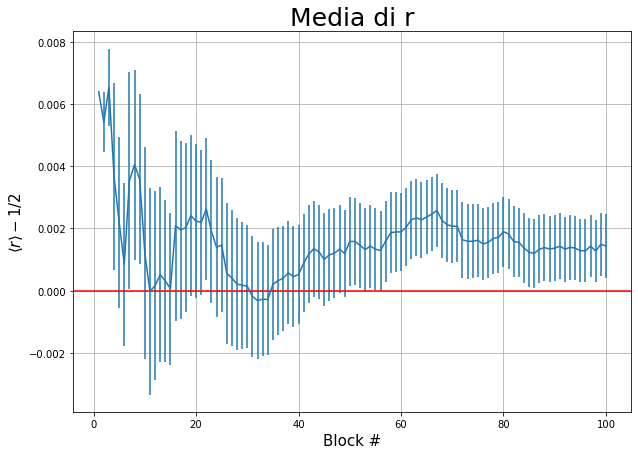

r medio (atteso 0.5): 
0.501438

Errore statistico : 
0.00101189


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N
plt.figure(figsize=(10,7))

ave, err, sig, errsig = np.loadtxt("ex1-1/results.out", usecols=(0,1,2,3), delimiter=' ', unpack='true')
plt.errorbar(x, ave-0.5, yerr = err)
plt.xlabel('Block #', fontsize=15)
plt.ylabel(r'$\langle r \rangle-1/2$', fontsize=15)
plt.title("Media di r", fontsize=25)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print('r medio (atteso 0.5): ')
print(ave[-1])
print('\nErrore statistico : ')
print(err[-1])

Il grafico mostra la convergenza di una serie di $M=100\,000$ lanci, con un errore inferiore a $1.5\,\sigma$. I valori progressivi sono calcolati col metodo del data blocking, con lanci raggruppati in $N=100$ blocchi.

La STD della media è infine calcolata come $\sigma_{mean} = \frac{\sigma}{\sqrt N}$. L'andamento $\propto \sqrt{N^{-1}}$ che caratterizza le stime degli errori nelle simulazioni Monte Carlo è particolarmente rilevante ad alte dimensionalità, dove altri algoritmi convergono molto più lentamente.

### b) Deviazione standard della media

In secondo luogo verifichiamo la convergenza a $1/12$ della varianza della media, definita dall'integrale $\langle \sigma^2 \rangle = \int_0^1 (r-1/2)^2 dr$, dove $r$ è ancora un numero (pseudo-)casuale nell'intervallo $[0,1)$.


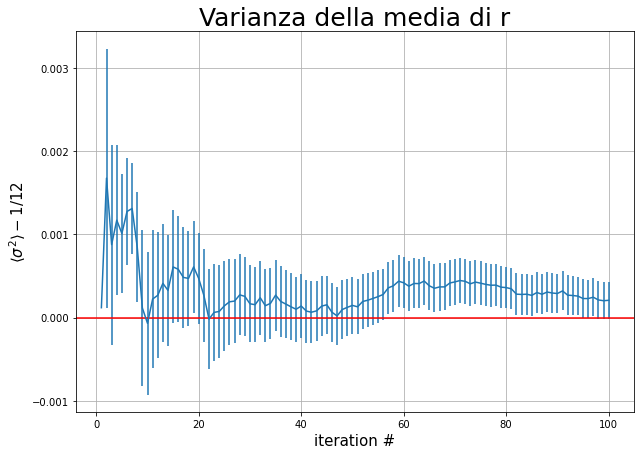

STD^2_mean media -1/12 (atteso 0) : 
0.0002072666666666778

Errore statistico : 
0.000222892


In [3]:
# Continuo usando variabili e funzioni della cella precedente

plt.figure(figsize=(10,7))

plt.errorbar(x, sig-1/12, yerr = errsig)
plt.xlabel('iteration #', fontsize = 15)
plt.ylabel(r'$\langle \sigma^2 \rangle-1/12$', fontsize = 15)
plt.title("Varianza della media di r", fontsize = 25)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print('STD^2_mean media -1/12 (atteso 0) : ')
print(sig[-1]-1/12)
print('\nErrore statistico : ')
print(errsig[-1])

Il grafico mostra la convergenza della $\sigma^2_{mean}$ con un errore appena inferiore a $1\,\sigma$. I valori progressivi sono calcolati anche in questo caso col metodo del data blocking.

### c) Test del $\chi^2$

I test precedenti sono validi sotto l'assunzione che i numeri casuali fossero correttamente estratti nell'intervallo $[0,1)$. Verifichiamo questa assunzione con il test del $\chi^2$: dividiamo l'intervallo in $M=100$ sottointervalli, per ciascuno dei quali eseguiamo $n=10\,000$ lanci. Per visualizzare graficamente il test, riempiamo i bin di un istogramma $n_i$, calcolando poi
$$
\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}
$$
dove $n_i$ è il numero di valori estratti nell'intervallo $[i/100, (i+1)/100)$.

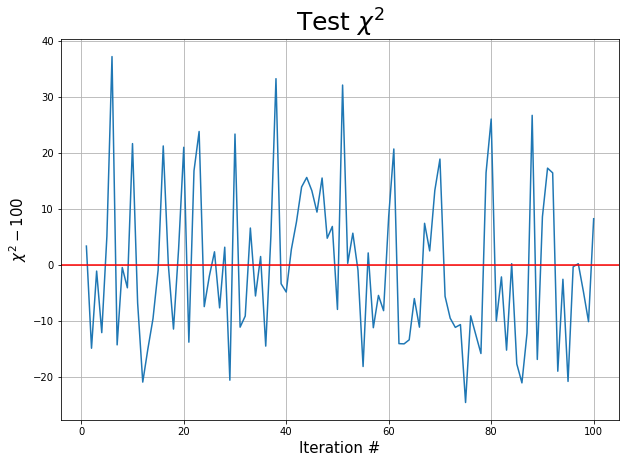

Chi^2 medio (atteso 100): 
99.76379999999997

Varianza (attesa 200): 
189.41751756000002

Errore statistico (atteso 14.1): 
13.76290367473376


In [102]:
# Continuo usando variabili e funzioni della cella precedente

plt.figure(figsize=(10,7))

chi = np.loadtxt("ex1-1/chi.out", usecols=(0), unpack='true')
plt.plot(x, chi-100)
plt.xlabel('Iteration #', fontsize = 15)
plt.ylabel('$\chi^2-100$', fontsize = 15)
plt.title("Test $\chi ^2$", fontsize =25)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print('Chi^2 medio (atteso 100): ')
print(np.mean(chi))
print('\nVarianza (attesa 200): ')
print(np.var(chi))
print('\nErrore statistico (atteso 14.1): ')
print(np.std(chi))


Come indicato anche in <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">questo link Wikipedia</a>, ci aspettiamo un valor medio $(n_i - n/M)^2 \simeq n/M$, ovvero $\chi^2 \simeq 100$, con varianza $2M$, quindi $\sigma = \sqrt {2M} = \sqrt 200 \approx 14.1$, compatibile col nostro risultato. 

Deduciamo quindi che la **pseudo** randomicità dei numeri generati non è distinguibile dai test appena eseguiti, ovvero che il generatore fornitoci dovrebbe rispondere adeguatamente alle nostre necessità.

## <span id="ex-1.2">  Esercizio 1.2 </span> [^](#toc)

In questo esercizio vogliamo estendere le funzionalità del Generatore di numeri Pseudo-Random e verificare la validità del Teorema del Limite Centrale (CLT), per il quale quando variabili casuali sono mediate tra loro durante l'estrazione, le medie tendono a distribuirsi come una gaussiana centrata sul "valore vero", **indipendentemente dalla distribuzione con cui sono estratte**, ammesso che questa abbia varianza finita.

In altre parole: se estraggo una variabile casuale con distribuzione ad esempio esponenziale e faccio direttamente l'istogramma delle estrazioni, ottengo un'esponenziale. Se estraggo le variabili a gruppi e ne salvo la media per ciascun gruppo, all'aumentare della dimensione del gruppo la distribuzione salvata tende a una gaussiana.



Per fare ciò, abbiamo innanzitutto aggiunto alla classe ```Random``` la possibilità di estrarre numeri con una distribuzione di probabilità:
- esponenziale $p(x) = \lambda \exp(-\lambda x)$, con $x\in [0;+\infty)$, con $\lambda=1$ nel nostro caso
- di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, con $x\in (-\infty;+\infty)$, con $\mu=0$ e $\Gamma=1$ nel nostro caso

usando il metodo dell'inversione della Cumulative Distribution Function (CDF).

L'inversione della CDF: $F(x) = \int_0^x p(x')dx' = y$ può essere risolta analiticamente (nota: non è scontato, come noteremo parlando di *importance sampling*) e porta ai rispettivi risultati:
- $x=-\frac{1}{\lambda} \ln(1-y)$
- $x=\Gamma \tan[\pi(y-1/2)]+\mu$ 

dove $y$ è estratto uniformemente tra 0 e 1.

Per verificare graficamente i risultati, riempiamo 4 istogrammi per ciascuna delle 3 distribuzioni: ogni istogramma raccoglie $10^4$ realizzazioni di $A_N = \frac{1}{N}\sum_{i=1}^N x_i$, con $N=1, 2, 10, 100$ (quindi i lanci totali sono rispettivamente $N\cdot10^4$), dove $x_i$ sono estratti secondo la relativa distribuzione.


In [4]:
# cose globali

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = [1,2,10,100]

color = ['orange', "red", "blue", "green"]
labels = ['$\mathbf{S_1}$','$\mathbf{S_2}$','$\mathbf{S_{10}}$','$\mathbf{S_{100}}$']
bins = 100

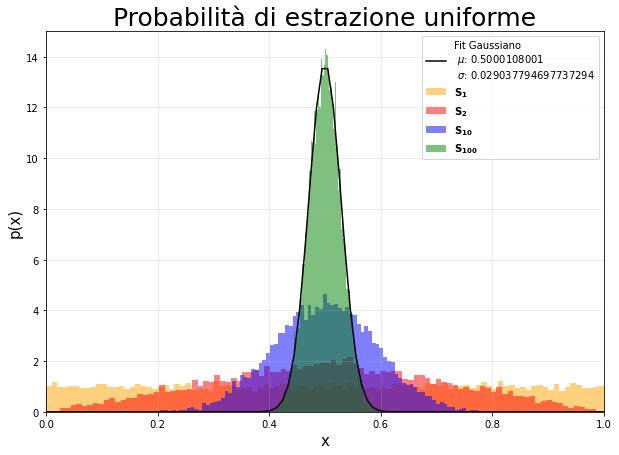

In [5]:

fig=plt.figure(figsize=(10,7))

for i in range(4):
    std = np.loadtxt("ex1-2/stand.out", skiprows = i*10000, max_rows = 10000, usecols=(0), unpack = 'true')
    plt.hist(std, bins, color = color[i], density='true', alpha = 0.5, label = labels[i]) # density normalizza i risultati
    
parameter = norm.fit(std)       # fit gaussiano su std
x = np.linspace(0, 1, bins)     # estremi di x, passi
y = norm.pdf(x, *parameter)     # calcola p(x)
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Gaussiano\n $\mu$: "+str(parameter[0])+"\n $\sigma$: "+str(parameter[1]))

plt.xlabel("x", fontsize = 15)
plt.ylabel('p(x)', fontsize = 15)
plt.title("Probabilità di estrazione uniforme", fontsize = 25)
plt.grid('true', alpha = 0.3)
plt.xlim(0,1)
plt.legend()

plt.show()

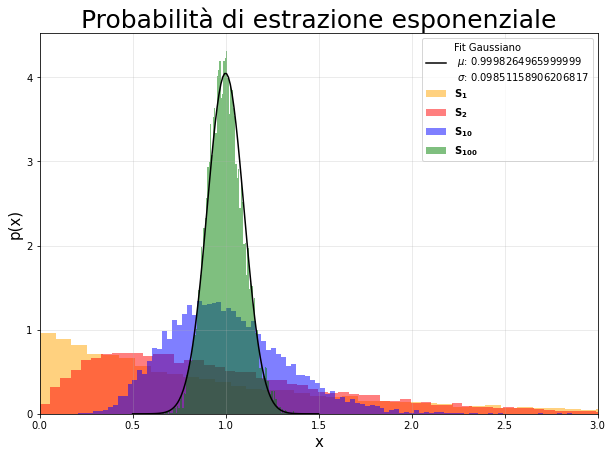

In [6]:
# Continuo usando variabili e funzioni della cella precedente

fig=plt.figure(figsize=(10,7))

for i in range(4):
    std = np.loadtxt("ex1-2/expon.out", skiprows = i*10000, max_rows = 10000, usecols=(0), unpack = 'true')
    plt.hist(std, bins, color = color[i], density='true', label = labels[i], alpha = 0.5) #density normalizza i risultati
    
parameter = norm.fit(std)           # fit normale su std
x = np.linspace(0.5,1.5, bins)      # estremi di x, passi
y = norm.pdf(x, *parameter)         # calcola p(x)
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Gaussiano\n $\mu$: "+str(parameter[0])+"\n $\sigma$: "+str(parameter[1]))

plt.xlabel("x", fontsize = 15)
plt.ylabel('p(x)', fontsize = 15)
plt.title("Probabilità di estrazione esponenziale", fontsize = 25)
plt.grid('true', alpha = 0.3)
plt.xlim(0,3)
plt.legend()

plt.show()

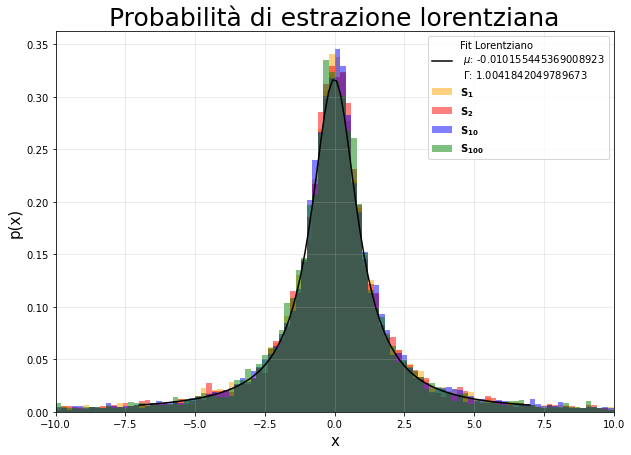

In [7]:
# Continuo usando variabili e funzioni della cella precedente

from scipy.stats import cauchy

fig=plt.figure(figsize=(10,7))

for i in range(4):
    lor = np.loadtxt("ex1-2/loren.out", skiprows = i*10000, max_rows = 10000, usecols=(0), unpack = 'true')
    plt.hist(lor, bins, range = (-10,+10),color = color[i], density='true', label = labels[i], alpha = 0.5)
         # nota: sono obbligato a chiedere un range perché la varianza è infinita
         #       e python automaticamente mette a "infinito" gli estremi
    
parameter = cauchy.fit(lor)    # fit lorentziano su lor
                               # fit gaussiano su lor? non funziona!
x = np.linspace(-7, 7, bins)   # estremi di x, passi
y = cauchy.pdf(x, *parameter)  # calcola p(x)
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Lorentziano\n $\mu$: "+str(parameter[0])+"\n $\Gamma$: "+str(parameter[1]))

plt.xlabel("x", fontsize = 15)
plt.ylabel('p(x)', fontsize = 15)
plt.title("Probabilità di estrazione lorentziana", fontsize = 25)
plt.grid('true', alpha = 0.3)
plt.xlim(-10,10)
plt.legend()

plt.show()

### Osservazioni

Nei primi due casi è evidente la convergenza alla distribuzione normale, mentre nell'ultimo istogramma la distribuzione lorenziana rimane sostanzialmente immutata: questo risultato è compatibile con il CLT, il quale infatti vale solo sotto l'assunzione che **la varianza della distribuzione di partenza sia finita**.

La distibuzione Lorentziana è comunque una [distribuzione stabile](https://en.wikipedia.org/wiki/Stable_distribution#A_generalized_central_limit_theorem), per cui vale il TLC generalizzato, e si dimostra tendere a sè stessa: anche questo è in accordo coi nostri risultati.

## <span id="ex-1.3">  Esercizio 1.3 </span>[^](#toc)

Mettiamo finalmente in pratica il GNC per un conto reale: volgiamo calcolare il valore di $\pi$ tramite l'esperimento di Buffon.

Un ago di lunghezza $L$ è lanciato casualmente su un pavimento a righe parallele equidistanti $d\gtrsim L$. La probabilità che l'ago intersechi una riga è $P = 2L/\pi d$, da cui per inversione possiamo ricavare $\pi$:
$$
\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}
$$
dove $N_{thr}$ ed $N_{hit}$ sono il numero di lanci e il numero di lanci intersecanti.


Per questo esercizio ho eseguito $10^6$ lanci suddivisi su $100$ blocchi per il data blocking. Per ciascun lancio ho generato casualmente la **posizione della cruna** (è sufficiente la coordinata perpendicolare alle righe del pavimento) applicando PBC proporzionali a $d$; dopodichè ho generato la posizione della punta dell'ago tramite metodo accept-reject: ogni coppia di coordinate generate casualmente in un rettangolo $L\times L$ viene accettata solo se si trova a distanza $<L$ dalla posizione della cruna. Ho poi normalizzato i punti accettati "portandoli" sulla circonferenza: essi individuano le **posizioni estratte per la punta** dell'ago (seconda figura). A questo punto ho contato $+1$ a $N_{hit}$ se tra la cruna e la punta venivano attraversate le PBC.

La simulazione è rappresentata graficamente in modo perfettamente analogo all'[esercizio 1.1](#ex-1.1), col metodo del data blocking.

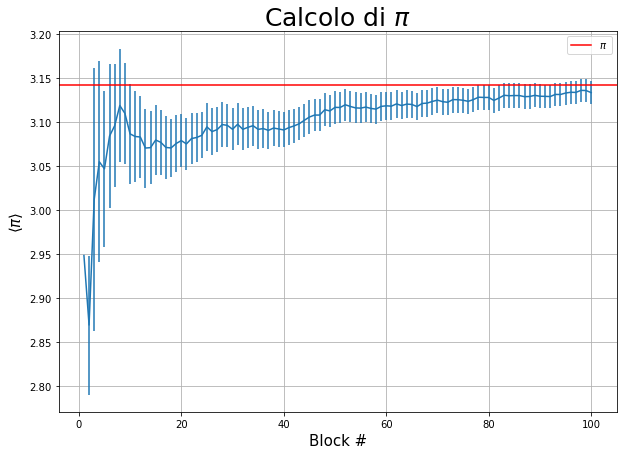

PI medio (atteso 3.141592653589793): 
3.13321

Errore statistico : 
0.0128896


In [107]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N = 100
x = np.arange(N)+1      
plt.figure(figsize=(10,7))

ave, err = np.loadtxt("ex1-3/results.out", usecols=(0,1), delimiter=' ', unpack='true')

plt.title("Calcolo di $\pi$", fontsize = 25)
plt.errorbar(x, ave, yerr = err)
plt.xlabel('Block #', fontsize =15)
plt.ylabel(r'$\langle \pi \rangle$', fontsize = 15)
plt.grid(True)
plt.axhline(y=math.pi, color = 'r', linestyle = '-', label = "$\pi$")
plt.legend()

plt.show()

print('PI medio (atteso '+str(np.pi)+'): ')
print(ave[-1])
print('\nErrore statistico : ')
print(err[-1])


Il grafico mostra la convergenza della stima di $\pi$ con un errore appena inferiore a $1\,\sigma$. I valori progressivi sono calcolati anche in questo caso col metodo del data blocking.

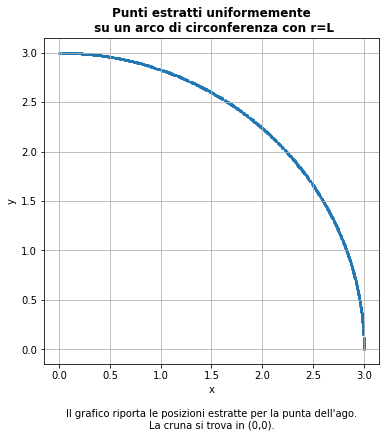

In [108]:
# Continuo usando variabili e funzioni della cella precedente

# verifico a occhio di aver estratto i punti uniformemente su (un arco di) circonferenza
N = 1000
x = np.arange(N)

x, y = np.loadtxt("ex1-3/results2.out", usecols=(0,1), max_rows = 1000, delimiter=' ', unpack='true')
fig=plt.figure(figsize=(6,6))

plt.title("Punti estratti uniformemente\n su un arco di circonferenza con r=L", weight = "bold")
plt.scatter(x, y, s = 3)
plt.xlabel('x\n\n'+
           "Il grafico riporta le posizioni estratte per la punta dell'ago.\n"
           "La cruna si trova in (0,0).", fontsize =10)
plt.ylabel('y', fontsize = 10)
plt.grid(True)

plt.show()